In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import linalg
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [2]:
# Numerical parameters
h = 1/10000
a = 1/1500
x = np.arange(0,10+a,a)
N = np.size(x)
T = (int)(np.round(0.12/h))

# Physical parameters
# Somewhat smooth potential spike of which the particle can scatter
V = 900*np.exp(-(x-3)**2/0.3**2)

#Inital condition
mu = 0.5
sigma =0.05
k0 = 50
psi0= 1/np.sqrt(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(4*sigma**2) + 1j*k0*x)


#### Crank-Nicholson

We solve here the 1D schrödinger equation with the Crank-Nicholson method. In this method we solve the systen
$$
(\frac{i}{h} \mathbb{I} - \frac{1}{2} H_a) \psi^{n+1} = (\frac{i}{h} \mathbb{I} + \frac{1}{2} H_a) \psi^n,
$$
where the discrete hamiltonian operator is given by (in atomic units)
$$
H_a \psi^n = \frac{-\psi^n_{j-1} + 2\psi^n_{j} - \psi^n_{j+1}}{2a^2} + V_j \psi^n_{j} 
$$

Here $i$ is the imaginary unit, $h$ is the time step size, $a$ is the spatial discretization size, $n$ labels the time steps and $j$ labels the spatial dimension.

We use atomic units. Lengths are in bohr radius, mass in electron mass, energy in Hartree and time in hbar/Ha.

In [5]:
#Program
#Construct matrices M and A
ones = np.ones(N)
Ha = sp.spdiags([-ones/(2*a*a), ones/(a*a)+V, -ones/(2*a*a)],[-1, 0, 1],N,N,format='csc')
M = 1j/h * sp.identity(N,format='csc') - 1/2*Ha
A = 1j/h * sp.identity(N,format='csc') + 1/2*Ha

# Factorize (direct solver) and save factorization in a solve routine
solve = sp.linalg.factorized(M)

# Repeatedly solve the system to evovle in time.
psi_t = np.empty((N,T))*0j
psi_t[:,0] = psi0
for n in range(1,T):
    psi_t[:,n] = solve(A.dot(psi_t[:,n-1]))


#### Animation of the result

<IPython.core.display.Javascript object>


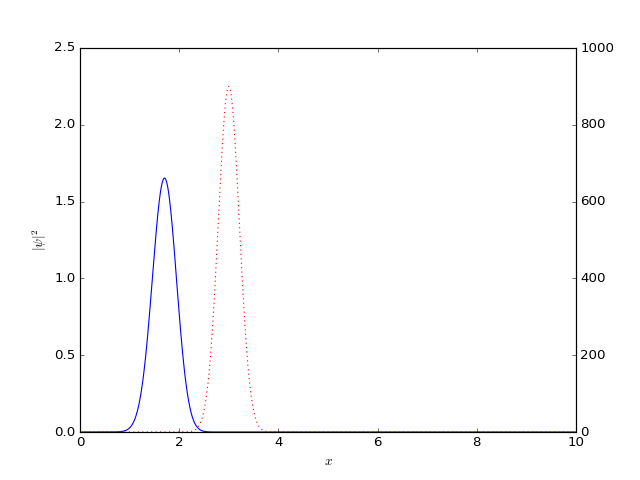

In [6]:
fig, ax = plt.subplots()
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')

line, = ax.plot(x, np.absolute(psi0)**2)
ax2 = ax.twinx()
ax2.plot(x,V,'r:')
ax.set_xlim(0,10)
ax.set_ylim(0,2.5)
ax2.set_ylim(0,1000)

def animationFunc(i):
    line.set_ydata(np.absolute(psi_t[:,i])**2)  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.absolute(psi0)**2)
    return line,

ani = animation.FuncAnimation(fig, animationFunc, init_func=init, frames = T, interval=10, blit = True, repeat = True)

#### Comments on the results
We start with a gaussian wave packet located around $x = \mu$ with a certain spread $\sigma$, and an initial momentum $k_0$. The wave disperses as it propagates. Around $x = 3$ we located a potential barrier (plotted in red on the right axis). We can see that the wave partially reflects and partially transmits through the potential. The reflected wave suffers from some numerical oscillations due to the parabolic nature of the schrödinger equation and the semi-explicit Crank-Nicholson method used.